In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# # ito na yun lahat fred

# import pandas as pd
# coord_df = pd.read_csv ('data/V_snowdepth_intensive_coordinates.csv') 
# snowdepth_df = pd.read_csv ('data/V_snowdepth_intensive_data.csv')

# # e: longitude, n: latitude
# coord_df = coord_df.rename(columns = {"e_dd":"lon", "n_dd":"lat"})

# snowdepth_df["t_date"] = pd.to_datetime(snowdepth_df["t_date"])
# snowdepth_df["year"] = snowdepth_df["t_date"].dt.year

# snowdepth_df = pd.merge(snowdepth_df, coord_df, on="sn_site", how="left", validate = "many_to_one")
# snowdepth_df.head()

## Arctic Snow Depth Background


[NASA data reveals declining Arctic snow depth](https://climate.nasa.gov/news/1140/nasa-data-reveals-declining-arctic-snow-depth/)

<blockquote>Over the past few decades, Arctic sea ice has been retreating, and although research shows a downward trend in snow on land in the Arctic, long-term measurements of snow depth on sea ice have been less clear. But now, new research using data from NASA's Operation IceBridge shows that snow depth on Arctic sea ice has been decreasing over the past several decades, a trend largely owing to later sea ice freeze-up dates in the Arctic.</blockquote>

https://nsidc.org/cryosphere/snow/science/characteristics.html

## Importing Datasets

In [ ]:
# Load the data set
# deleting v_comment because it's empty
aux_df = pd.read_csv ("data/V_snowdepth_intensive_aux.csv").drop(["v_comment"], axis=1)
coord_df = pd.read_csv ('data/V_snowdepth_intensive_coordinates.csv') 
snowdepth_df = pd.read_csv ('data/V_snowdepth_intensive_data.csv')

In [ ]:
for df in [aux_df, coord_df, snowdepth_df]:
    assert not df.duplicated().any()

## Auxilliary Dataset

Miscellaneous info on which sites were included in the study design. Mostly just describes the start and end year of operation for the stations

In [ ]:
aux_df.head()

,sn_region,sn_locality,sn_section,sc_type_of_sites_ecological,sn_site,sn_site_old,year_first,year_last
0,varanger,ifjordfjellet,eastordalen,snowbed,if_ea_sn_1,ia01,2011,2016.0
1,varanger,ifjordfjellet,eastordalen,snowbed,if_ea_sn_2,ia02,2011,2016.0
2,varanger,ifjordfjellet,eastordalen,snowbed,if_ea_sn_3,ia03,2011,2016.0
3,varanger,ifjordfjellet,eastordalen,snowbed,if_ea_sn_4,ia04,2011,2016.0
4,varanger,ifjordfjellet,eastordalen,snowbed,if_ea_sn_5,ia05,2011,2016.0


In [ ]:
aux_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sn_region                    144 non-null    object 
 1   sn_locality                  144 non-null    object 
 2   sn_section                   144 non-null    object 
 3   sc_type_of_sites_ecological  144 non-null    object 
 4   sn_site                      144 non-null    object 
 5   sn_site_old                  144 non-null    object 
 6   year_first                   144 non-null    int64  
 7   year_last                    94 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 9.1+ KB


In [ ]:
assert not aux_df["sn_site"].duplicated().any()

In [ ]:
aux_df.describe(include='all')

,sn_region,sn_locality,sn_section,sc_type_of_sites_ecological,sn_site,sn_site_old,year_first,year_last
count,144,144,144,144,144,144,144.000000,94.000000
unique,1,3,7,2,144,144,NaN,NaN
top,varanger,vestre_jakobselv,bearalveaijohka,snowbed,ko_kj_sn_14,vb07,NaN,NaN
freq,144,54,27,137,1,1,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2011.736111,2014.010638
std,NaN,NaN,NaN,NaN,NaN,NaN,2.394592,1.668782
min,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,2013.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,2013.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,2013.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,2016.000000


In [ ]:
aux_df.isna().sum()

sn_region                       0
sn_locality                     0
sn_section                      0
sc_type_of_sites_ecological     0
sn_site                         0
sn_site_old                     0
year_first                      0
year_last                      50
dtype: int64

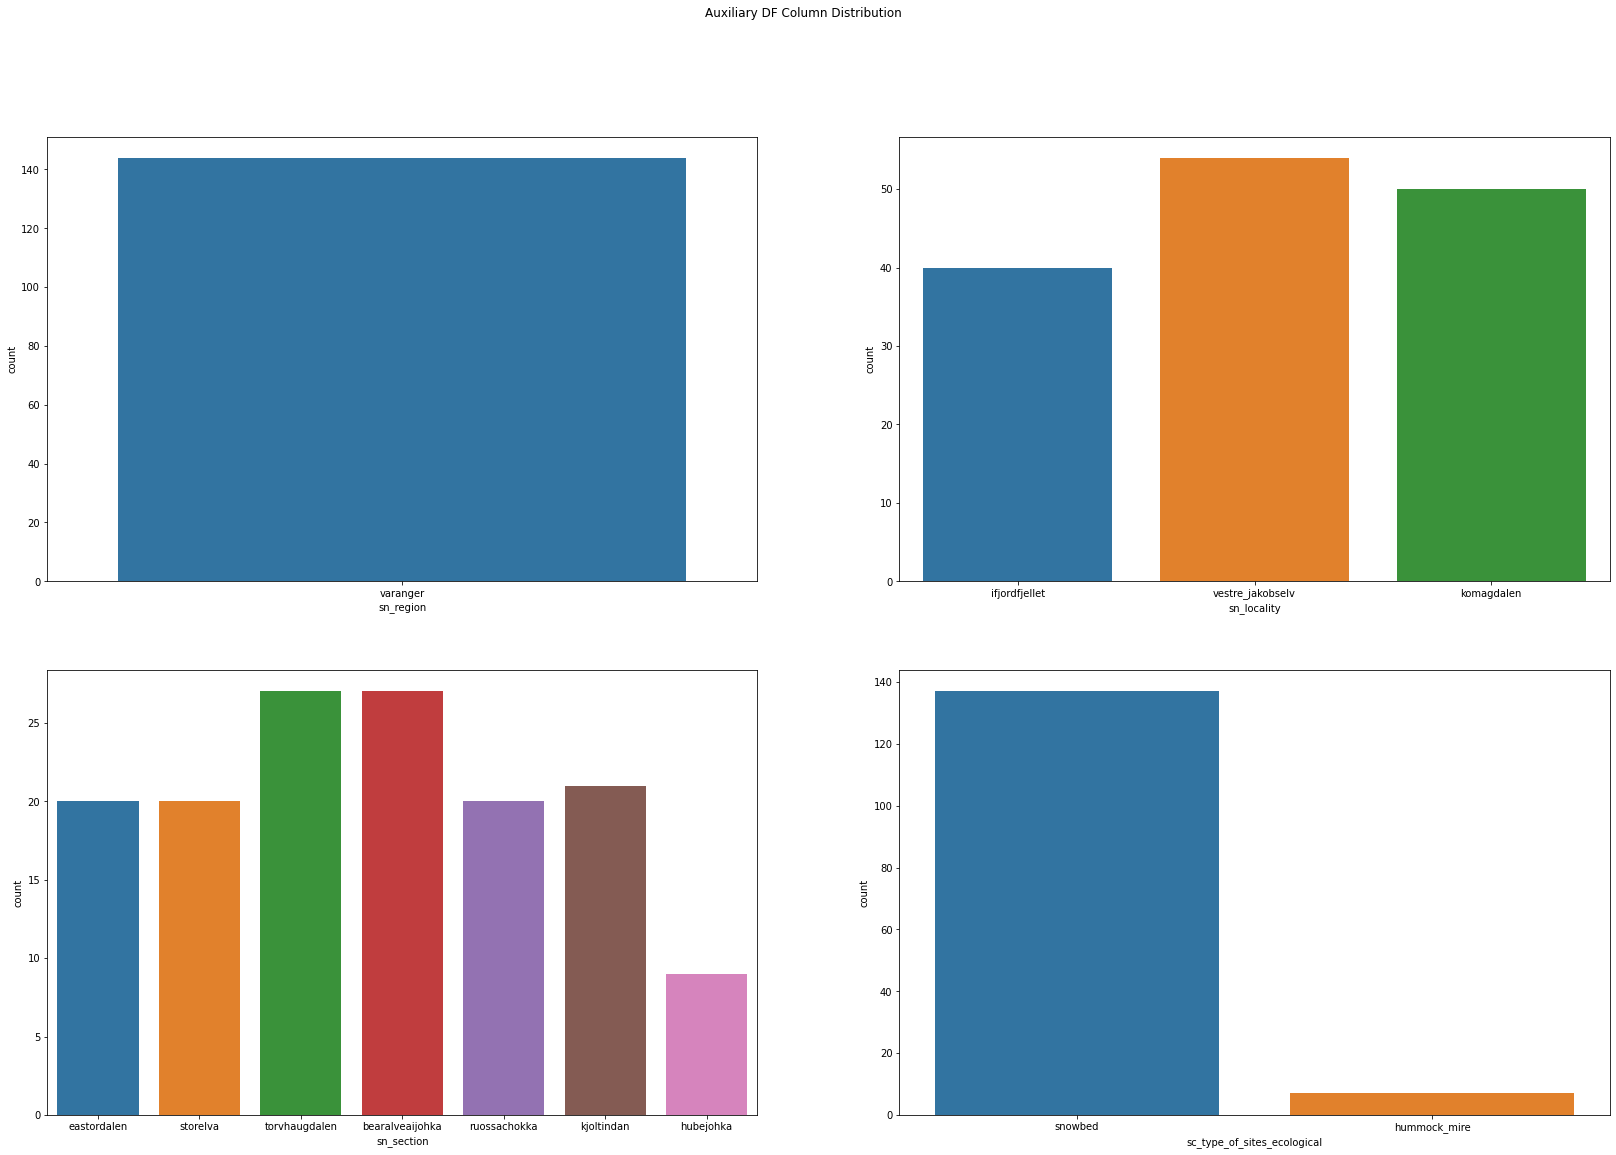

In [ ]:
aux_object_cols = ['sn_region', 'sn_locality', 'sn_section', 'sc_type_of_sites_ecological']

# Value Counts for each object column
fig, axes = plt.subplots(2, 2, figsize=(28, 18))
fig.suptitle('Auxiliary DF Column Distribution')

row = 0
col = 0
for i, column in enumerate(aux_object_cols):

    sns.countplot(ax=axes[row, col], data=aux_df, x=column)
    if (i+1) % 2 == 0:
        row += 1
        col=0
    else:
        col+=1

## Coordinates Dataset

This contains the coordinates of each observation station in Norway

In [ ]:
# e: longitude, n: latitude

coord_df = coord_df.rename(columns = {"e_dd":"lon", "n_dd":"lat"})
coord_df.head()

,sn_site,lon,lat,e_utm33,n_utm33
0,if_ea_sn_1,27.35208,70.42404,959119.695296,7.860013e+06
1,if_ea_sn_2,27.35316,70.42437,959151.893691,7.860058e+06
2,if_ea_sn_3,27.35785,70.42369,959339.466240,7.860019e+06
3,if_ea_sn_4,27.35821,70.42272,959374.611493,7.859915e+06
4,if_ea_sn_5,27.36589,70.42321,959645.530255,7.860027e+06


In [ ]:
coord_df.describe(include='all')

,sn_site,lon,lat,e_utm33,n_utm33
count,144,144.000000,144.000000,1.440000e+02,1.440000e+02
unique,144,NaN,NaN,NaN,NaN
top,ko_kj_sn_14,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,28.928039,70.340185,1.018975e+06,7.863897e+06
std,NaN,1.013287,0.045276,3.799353e+04,6.024233e+03
min,NaN,27.352080,70.279660,9.591197e+05,7.857596e+06
25%,NaN,27.539117,70.305391,9.664249e+05,7.858896e+06
50%,NaN,29.071830,70.329055,1.025098e+06,7.860804e+06
75%,NaN,29.829355,70.394485,1.052106e+06,7.871067e+06


In [ ]:
coord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sn_site  144 non-null    object 
 1   lon      144 non-null    float64
 2   lat      144 non-null    float64
 3   e_utm33  144 non-null    float64
 4   n_utm33  144 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.8+ KB


## Snowdepth Dataset

This contains the snow depth in cm per observation per station across the years

In [ ]:
snowdepth_df["t_date"] = pd.to_datetime(snowdepth_df["t_date"])
snowdepth_df["year"] = snowdepth_df["t_date"].dt.year
snowdepth_df.head()

/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/lib/histograms.py:822: RuntimeWarning: divide by zero encountered in double_scalars
  norm = n_equal_bins / _unsigned_subtract(last_edge, first_edge)
/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/lib/histograms.py:850: RuntimeWarning: invalid value encountered in multiply
  f_indices = _unsigned_subtract(tmp_a, first_edge) * norm


,sn_region,sn_locality,sn_section,sn_site,sn_plot,t_date,v_observer,v_depth,v_comment,year
0,varanger,vestre_jakobselv,bearalveaijohka,vj_be_sn_1,-10.0,2019-03-22,ri_ny,20.0,NaN,2019
1,varanger,vestre_jakobselv,bearalveaijohka,vj_be_sn_1,-5.0,2019-03-22,ri_ny,55.0,NaN,2019
2,varanger,vestre_jakobselv,bearalveaijohka,vj_be_sn_1,0.0,2019-03-22,ri_ny,110.0,NaN,2019
3,varanger,vestre_jakobselv,bearalveaijohka,vj_be_sn_1,5.0,2019-03-22,ri_ny,225.0,NaN,2019
4,varanger,vestre_jakobselv,bearalveaijohka,vj_be_sn_1,10.0,2019-03-22,ri_ny,200.0,NaN,2019


In [ ]:
snowdepth_df.describe(include='all')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,sn_region,sn_locality,sn_section,sn_site,sn_plot,t_date,v_observer,v_depth,v_comment,year
count,3713,3713,3713,3713,3710.000000,3713,333,3536.000000,336,3713.000000
unique,1,3,7,144,NaN,37,3,NaN,43,NaN
top,varanger,vestre_jakobselv,bearalveaijohka,ko_kj_sn_10,NaN,2012-03-21 00:00:00,de_jak,NaN,snow was too hard,NaN
freq,3713,1580,1175,50,NaN,235,138,NaN,117,NaN
first,NaN,NaN,NaN,NaN,NaN,2011-03-17 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2020-03-18 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,192.147624,NaN,2014.148936
std,NaN,NaN,NaN,NaN,7.072021,NaN,NaN,88.097870,NaN,2.652191
min,NaN,NaN,NaN,NaN,-10.000000,NaN,NaN,0.000000,NaN,2011.000000
25%,NaN,NaN,NaN,NaN,-5.000000,NaN,NaN,129.000000,NaN,2012.000000


In [ ]:
snowdepth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3713 entries, 0 to 3712
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sn_region    3713 non-null   object        
 1   sn_locality  3713 non-null   object        
 2   sn_section   3713 non-null   object        
 3   sn_site      3713 non-null   object        
 4   sn_plot      3710 non-null   float64       
 5   t_date       3713 non-null   datetime64[ns]
 6   v_observer   333 non-null    object        
 7   v_depth      3536 non-null   float64       
 8   v_comment    336 non-null    object        
 9   year         3713 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 290.2+ KB


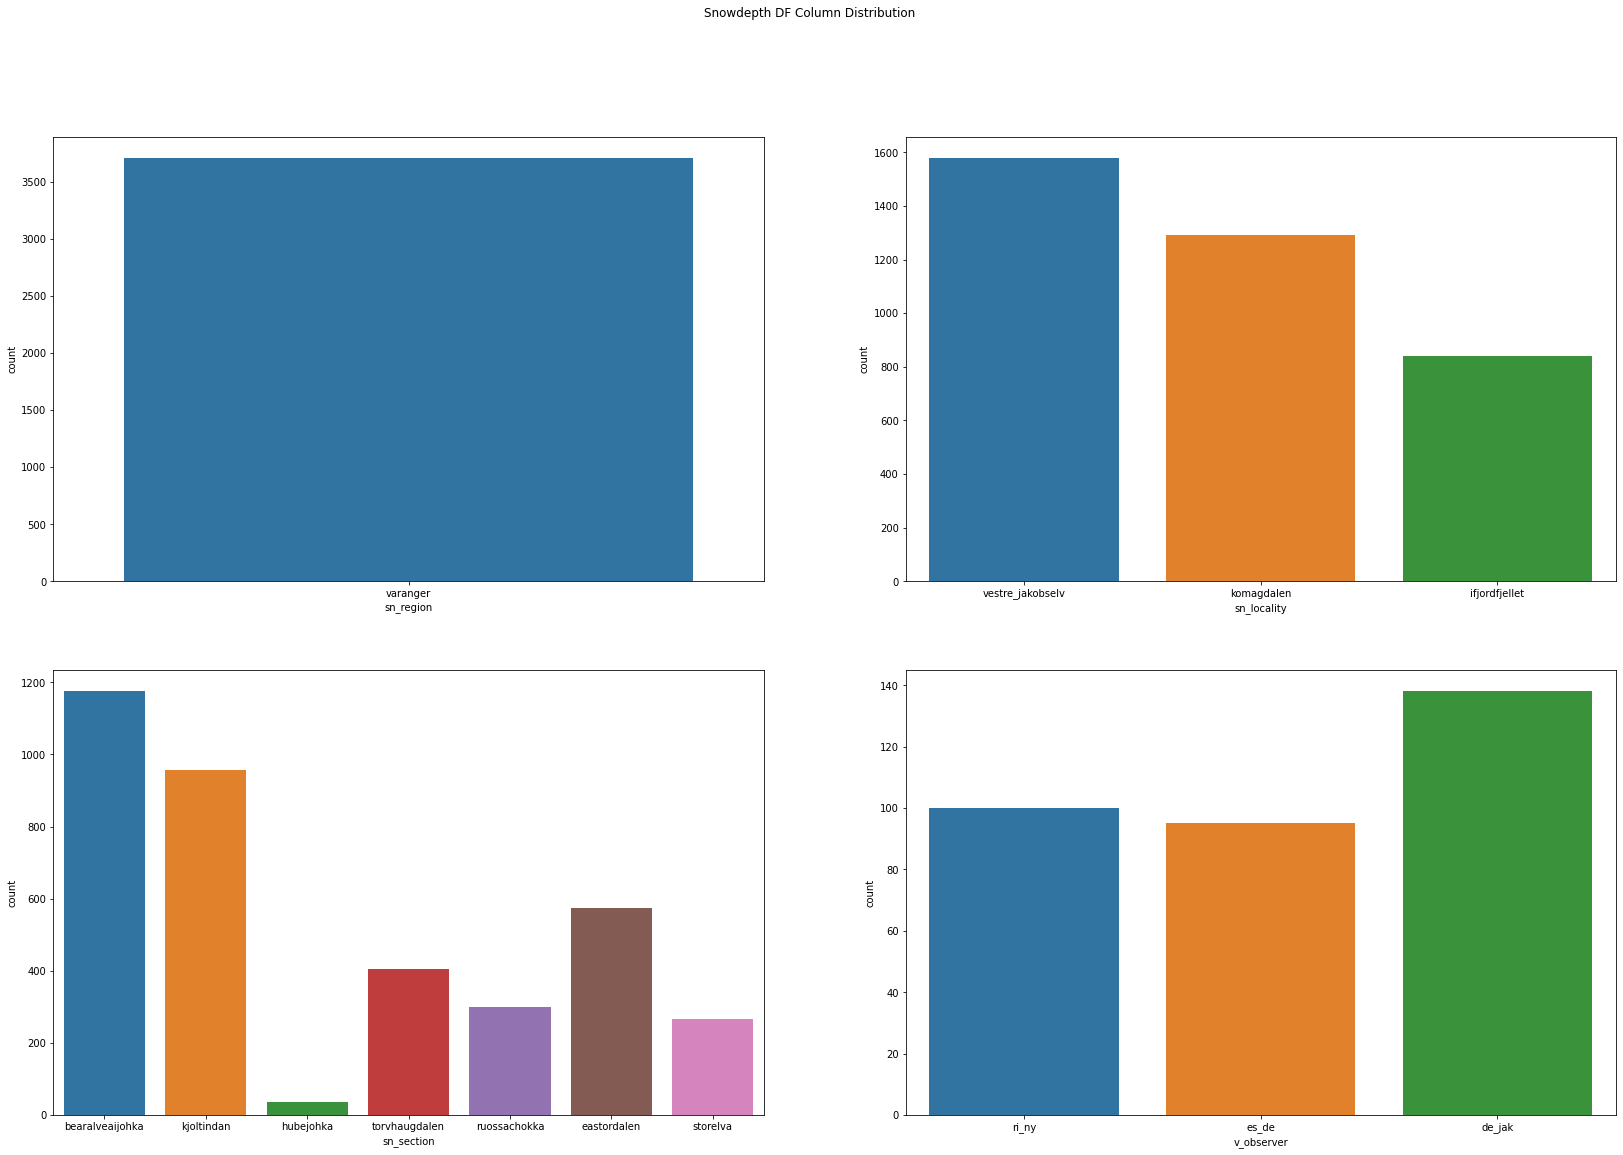

In [ ]:
snowdepth_object_cols = ['sn_region', 'sn_locality', 'sn_section', 'v_observer']

# Value Counts for each object column
fig, axes = plt.subplots(2, 2, figsize=(28, 18))
fig.suptitle('Snowdepth DF Column Distribution')

row = 0
col = 0
for i, column in enumerate(snowdepth_object_cols):

    sns.countplot(ax=axes[row, col], data=snowdepth_df, x=column)
    if (i+1) % 2 == 0:
        row += 1
        col=0
    else:
        col+=1

In [ ]:
snowdepth_df['sn_plot'].value_counts()

 0.0     742
-10.0    742
 5.0     742
 10.0    742
-5.0     742
Name: sn_plot, dtype: int64

In [ ]:
snowdepth_df.isna().sum()

sn_region         0
sn_locality       0
sn_section        0
sn_site           0
sn_plot           3
t_date            0
v_observer     3380
v_depth         177
v_comment      3377
year              0
dtype: int64

In [ ]:
snowdepth_df['v_comment'].value_counts()

snow was too hard                                                                                                        117
minimum depth                                                                                                             51
distance measured with steps because of strong wind                                                                       40
avalanche risk                                                                                                            27
unsure what is below and what is above becuase of bad visibility; distance measured with steps because of strong wind     15
more than 350 cm                                                                                                          14
point (15 m from the boks)                                                                                                 6
avalance risk                                                                                                              5


In [ ]:
# snowdepth_df = pd.merge(snowdepth_df, coord_df, on="sn_site", how="left", validate = "many_to_one")
# snowdepth_df.head()

In [ ]:
# aggregate plots by station
groupcols = ["sn_region","sn_locality","sn_section","sn_site","year"] 
snowdepth_by_locality_df = snowdepth_df.groupby(groupcols)["v_depth"].mean().reset_index()

# aggregate plots by sn_locality
groupcols = ["sn_region", "sn_locality","year"]
snowdepth_by_locality_df = snowdepth_by_locality_df.groupby(groupcols)["v_depth"].mean().reset_index()

snowdepth_by_locality_df

,sn_region,sn_locality,year,v_depth
0,varanger,ifjordfjellet,2011,200.167742
1,varanger,ifjordfjellet,2012,138.677632
2,varanger,ifjordfjellet,2013,238.636364
3,varanger,ifjordfjellet,2014,204.473684
4,varanger,ifjordfjellet,2015,108.220000
5,varanger,ifjordfjellet,2016,166.220000
6,varanger,komagdalen,2011,180.663158
7,varanger,komagdalen,2012,137.307692
8,varanger,komagdalen,2013,210.769231
9,varanger,komagdalen,2014,212.052632


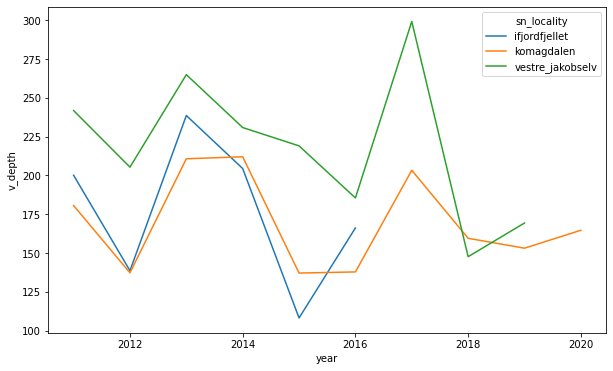

In [ ]:
fig,  ax = plt.subplots(figsize = (10,6))
sns.lineplot(x = "year", y = "v_depth", hue = "sn_locality", data = snowdepth_by_locality_df, 
                ax = ax, estimator = np.mean)
plt.show()

Data Viz

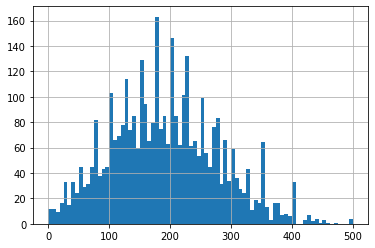

In [ ]:
snowdepth_df["v_depth"].hist(bins = 80)
plt.show()

<AxesSubplot:xlabel='v_depth', ylabel='sn_section'>

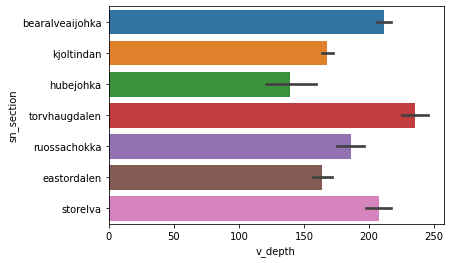

In [ ]:
sns.barplot(x="v_depth", y="sn_section", data=snowdepth_df)

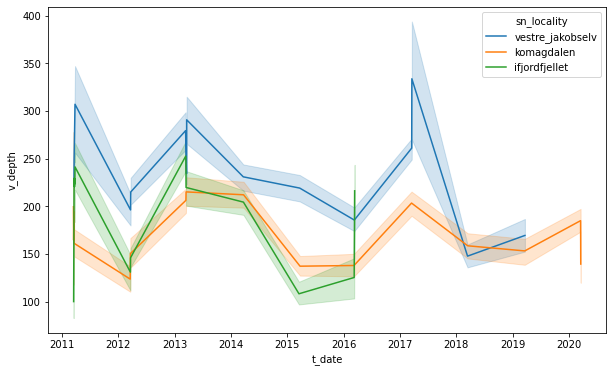

In [ ]:
fig,  ax = plt.subplots(figsize = (10,6))
sns.lineplot(x = "t_date", y = "v_depth", hue = "sn_locality", data = snowdepth_df, ax = ax,
                estimator = np.mean)
plt.show()

In [ ]:
snowdepth_df.head()

/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/lib/histograms.py:822: RuntimeWarning: divide by zero encountered in double_scalars
  norm = n_equal_bins / _unsigned_subtract(last_edge, first_edge)
/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/lib/histograms.py:850: RuntimeWarning: invalid value encountered in multiply
  f_indices = _unsigned_subtract(tmp_a, first_edge) * norm


,sn_region,sn_locality,sn_section,sn_site,sn_plot,t_date,v_observer,v_depth,v_comment,lon,lat,e_utm33,n_utm33
0,varanger,vestre_jakobselv,bearalveaijohka,vj_be_sn_1,-10.0,2019-03-22,ri_ny,20.0,NaN,28.99978,70.27966,1.023156e+06,7.857596e+06
1,varanger,vestre_jakobselv,bearalveaijohka,vj_be_sn_1,-5.0,2019-03-22,ri_ny,55.0,NaN,28.99978,70.27966,1.023156e+06,7.857596e+06
2,varanger,vestre_jakobselv,bearalveaijohka,vj_be_sn_1,0.0,2019-03-22,ri_ny,110.0,NaN,28.99978,70.27966,1.023156e+06,7.857596e+06
3,varanger,vestre_jakobselv,bearalveaijohka,vj_be_sn_1,5.0,2019-03-22,ri_ny,225.0,NaN,28.99978,70.27966,1.023156e+06,7.857596e+06
4,varanger,vestre_jakobselv,bearalveaijohka,vj_be_sn_1,10.0,2019-03-22,ri_ny,200.0,NaN,28.99978,70.27966,1.023156e+06,7.857596e+06


In [ ]:
snowdepth_df.loc[snowdepth_df["v_depth"].isnull(),:]

,sn_region,sn_locality,sn_section,sn_site,sn_plot,t_date,v_observer,v_depth,v_comment,lon,lat,e_utm33,n_utm33
360,varanger,komagdalen,kjoltindan,ko_kj_sn_9,10.0,2018-03-16,NaN,NaN,could not get through,29.80519,70.34033,1.051102e+06,7.871339e+06
363,varanger,komagdalen,kjoltindan,ko_kj_sn_9,-5.0,2018-03-16,NaN,NaN,could not get through,29.80519,70.34033,1.051102e+06,7.871339e+06
364,varanger,komagdalen,kjoltindan,ko_kj_sn_9,-10.0,2018-03-16,NaN,NaN,could not get through,29.80519,70.34033,1.051102e+06,7.871339e+06
843,varanger,komagdalen,ruossachokka,ko_ru_sn_3,10.0,2011-03-20,NaN,NaN,"Very hard snow, uncertain whether we reached t...",30.09634,70.32753,1.062097e+06,7.872626e+06
844,varanger,komagdalen,ruossachokka,ko_ru_sn_3,5.0,2011-03-20,NaN,NaN,NaN,30.09634,70.32753,1.062097e+06,7.872626e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,varanger,ifjordfjellet,eastordalen,if_ea_sn_3,0.0,2014-03-23,NaN,NaN,avalanche risk,27.35785,70.42369,9.593395e+05,7.860019e+06
3626,varanger,ifjordfjellet,eastordalen,if_ea_sn_3,5.0,2014-03-23,NaN,NaN,avalanche risk,27.35785,70.42369,9.593395e+05,7.860019e+06
3627,varanger,ifjordfjellet,eastordalen,if_ea_sn_3,10.0,2014-03-23,NaN,NaN,avalanche risk,27.35785,70.42369,9.593395e+05,7.860019e+06
3698,varanger,ifjordfjellet,eastordalen,if_ea_sn_18,-10.0,2014-03-23,NaN,NaN,avalanche risk,27.37086,70.40382,9.602667e+05,7.857942e+06


In [ ]:
snowdepth_df.groupby('sn_locality')['sn_section'].count()

sn_locality
ifjordfjellet        840
komagdalen          1293
vestre_jakobselv    1580
Name: sn_section, dtype: int64

In [ ]:
snowdepth_df.to_csv("kepler/snowdepth_df.csv", index=False)

# Map Data 
size based on depth; color based on date (blue: old, recent:red)
![map viz](kepler/varanger-snowdepth.png "Map")

![zoomed in photo](kepler/torvhaugdalen.png "zoomed in")

#### Project Submission Requirements:




In [2]:
# Project Name (catchy)
# Images (up to 5)
# Punchline
# Challenges
# Technologies & Tools
# [NONE] Video link
# [NONE] Demo URL
# [DONE] Source code

# Project Edward Snowdepth: Snow Depth Dashboard

A **Monitoring Dashboard** showing the trend of **snowdepth measurements** on the **Varanger peninsula** from **COAT**'s *(Climate-ecological Observatory for Arctic Tundra)* data portal.

# Images:
## Cover image
!["snow"](images/climate-ecological-observatory-arctic-tundra-varanger-norway_5818.jpg "arctic")

## 5 images


size based on depth; color based on date (blue: old, recent:red)
![map viz](kepler/varanger-snowdepth.png "Map")

![workflow](hta2021-snowdepth-analysis/images/workflow.png)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=242e7126-0501-4f85-b261-73586476b02d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>